<h1><center> HAPPY CUSTOMER BANK DATASET ANALYSIS </center></h1>


## INTRODUCTION

The following notebook describes the step taken to perform an end-to-end Exploratory Data Analysis (EDA). Through the application of EDA it is intended to understand the behavior of **LEAD** and **NON LEAD** customers. In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards. This research was developed based on the following question: **What are the factors associated with lead customer?**


**Objectives**

   - Describe the customer profile;
   - Check the bivariate association between the variable of interest and the other variables;
   - Identify possible factors associated with lead customer.

This notebook contains EDA:
1. **Variable Identification and Typecasting**;
2. **Univariate analysis**:
    - Graphical visualization of all types of variables.
    - Identification and treatment of missing value;
    - Identification and treatment of outliers;
        
    
3. **Bivariate analysis**:
    - Correlation;
    - Hypothesis testing (Chi-square and Z-test/T-test);
    
    
4. **Multivariate analysis**.

This project uses libraries such as **pandas**, **numpy**, **matplotlib**, **seaborn** and **scipy.stats**.

## DATA ANALYSIS

In [564]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
import warnings
from sklearn.preprocessing import LabelEncoder
import copy
warnings.filterwarnings(action = 'ignore')

In [565]:
credit_card=pd.read_csv("C:\\Users\\YashnaBehera\\Downloads\\Data.csv")
credit_card.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [566]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [567]:
print('There are', '\033[1m', credit_card.shape[0], '\033[0m', 'observations in the dataset and',
      '\033[1m', credit_card.shape[1], '\033[0m','variables, where one refers to the Customer ID and 9 independent variables and 1 target variable (Is Lead)')

There are  245725  observations in the dataset and  11  variables, where one refers to the Customer ID and 9 independent variables and 1 target variable (Is Lead)


In [568]:
(credit_card.isnull().sum()/credit_card.shape[0])*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

There are missing values in the data. 
For **`credit product`**, around 11% of the data is composed by missing values; 

##### MISSING VALUE TREATMENT


Considering that the variables which have missing values are categorical, we will change the missing values by the mode of each variable.

In [569]:
credit_card['Credit_Product'].fillna(credit_card['Credit_Product'].mode()[0], inplace = True)

In [570]:
(credit_card.isnull().sum()/credit_card.shape[0])*100

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
Is_Lead                0.0
dtype: float64

## TYPECASTING

In [572]:
print('This data is composed of: \n', '\033[1m -', (credit_card.dtypes == 'int64').sum(), '\033[0m', 
      'Integer variables \n', '\033[1m -', (credit_card.dtypes == 'object').sum(), '\033[0m', 'Object vaiables')

This data is composed of: 
  - 4  Integer variables 
  - 7  Object vaiables


In [573]:
# Finding out the integers variables
credit_card.dtypes[credit_card.dtypes == 'int64']

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
Is_Lead                int64
dtype: object

Is_lead means whether the customer is a lead or not so it comes us categorical data type and not integer

In [574]:
# Finding out the object variables
credit_card.dtypes[credit_card.dtypes == 'object']

ID                object
Gender            object
Region_Code       object
Occupation        object
Channel_Code      object
Credit_Product    object
Is_Active         object
dtype: object

In [575]:
#Typecasting the object variables to categoriy
credit_card['ID'] = credit_card['ID'].astype('category')
credit_card['Gender'] = credit_card['Gender'].astype('category')
credit_card['Region_Code'] = credit_card['Region_Code'].astype('category')
credit_card['Occupation'] = credit_card['Occupation'].astype('category')
credit_card['Channel_Code'] = credit_card['Channel_Code'].astype('category')
credit_card['Credit_Product'] = credit_card['Credit_Product'].astype('category')
credit_card['Is_Active'] = credit_card['Is_Active'].astype('category')
credit_card['Is_Lead'] = credit_card['Is_Lead'].astype('category')

In [576]:
credit_card.dtypes

ID                     category
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                category
dtype: object

## Discriptive Info

In [577]:
round(credit_card.describe(include = ['int64']),2)

,Age,Vintage,Avg_Account_Balance
count,245725.00,245725.00,245725.00
mean,43.86,46.96,1128403.10
std,14.83,32.35,852936.36
min,23.00,7.00,20790.00
25%,30.00,20.00,604310.00
50%,43.00,32.00,894601.00
75%,54.00,73.00,1366666.00
max,85.00,135.00,10352009.00


In [578]:
credit_card.describe(include = ['category'])

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,Is_Lead
count,245725,245725,245725,245725,245725,245725,245725,245725
unique,245725,2,35,4,4,2,2,2
top,ZZZZ6MXS,Male,RG268,Self_Employed,X1,No,No,0
freq,1,134197,35934,100886,103718,173682,150290,187437


## Univariate Analysis

In [633]:
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (5*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'green', label = "std_dev")
    sns.scatterplot(x = [mini,maxi], y = [0, 0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 15)
    plt.ylabel('density', fontsize = 15)
    plt.title('std_dev = {};kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)),fontsize=15)

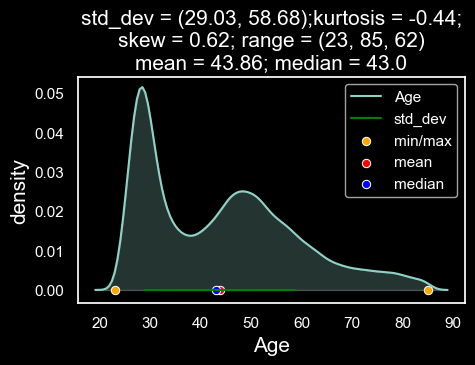

In [634]:
UVA_KDE(credit_card,["Age"])
plt.style.use('dark_background')
plt.grid(b=None)

**Summary of Numerical Variables:**
*    **age**:
    *    Median Age = 43
    *    It's a bimodal distribution
    *    **Most customers age between 23 to 85**
    *    skewness +0.62 : customer age is **negligibly biased towards younger age**
    *    **kurtosis = -0.44**; less likely to have extreme/outlier values.

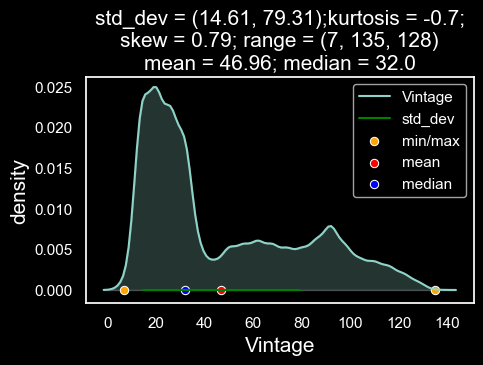

In [635]:
UVA_KDE(credit_card,["Vintage"])
plt.style.use('dark_background')
plt.grid(b=None)

*    **vintage:**
    *    Most customers joined between 7 and 135 months.
    *    **skewness** 0.62 : this right skewed, **vintage variable is significantly not biased towards longer association of customers.**
    *    **Kurtosis = -0.7**: Extreme values and Outliers are very less likely to be present in vintage.

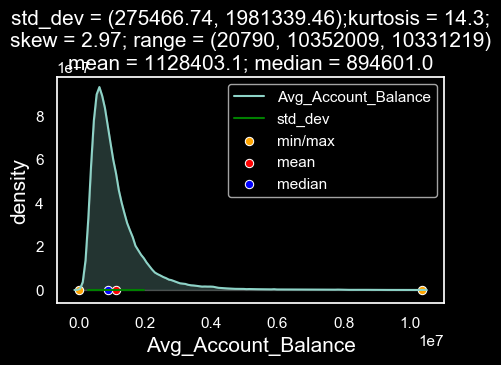

In [636]:
UVA_KDE(credit_card,["Avg_Account_Balance"])
plt.style.use('dark_background')
plt.grid(b=None)

 **avg account balance:**
    *    Range of avg balance is between 20790 and **10352009**
    *    **skewness** 2.92 : this right skewed, **avg balance variable is significantly not biased towards customers with low balance.**
    *    **Kurtosis = 14.3**: Extreme values and Outliers are very likely to be present in avg balance.

**Need to Remove Outliers to visulaise the plot**

In [637]:
# standard deviation factor
factor = 3

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = credit_card[credit_card["Avg_Account_Balance"] < factor*credit_card["Avg_Account_Balance"].std()]

# checking how many points removed
len(credit_card), len(cm_data)

(245725, 231873)

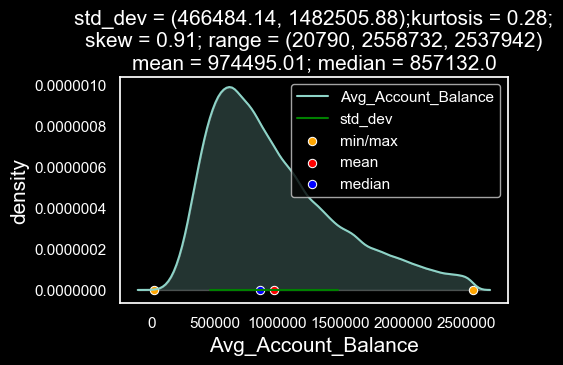

In [638]:
UVA_KDE(cm_data,["Avg_Account_Balance"])
plt.style.use('dark_background')
plt.grid(b=None)

*    After Removing extreme/outliers, plots are still skewed.

**Summary of Numerical Variables:**
*   Age, vintage and avg account balance does not have any significant relation with
*   Distribution of age and vintage variable does not have extream value and outliers but avg account balance even after removing outliers is skewed.

In [606]:
def UVA_category(data, var_group):
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index,color="yellow")
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    plt.grid(False)
    plt.tight_layout()

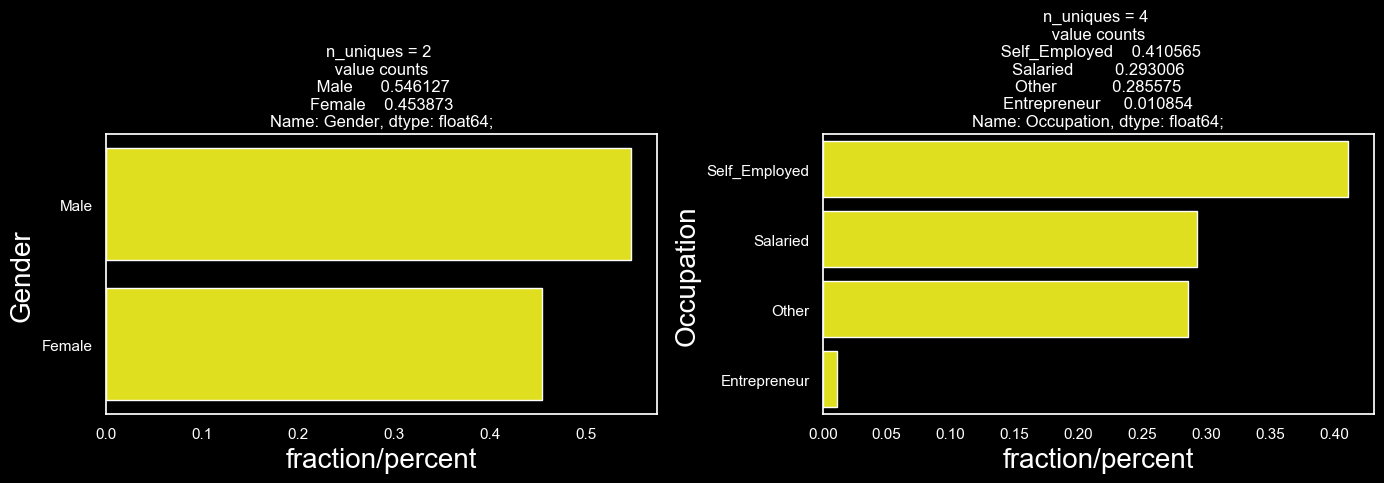

In [607]:
UVA_category(credit_card,["Gender","Occupation"])
plt.style.use('dark_background')

*    **Gender:**
    *    % Male customers is 54 where as Female customers are 45%.
*    **Occupation:**
    * Majority of people are self_employed.
    * There are extremely few Entrepreneurs.
   

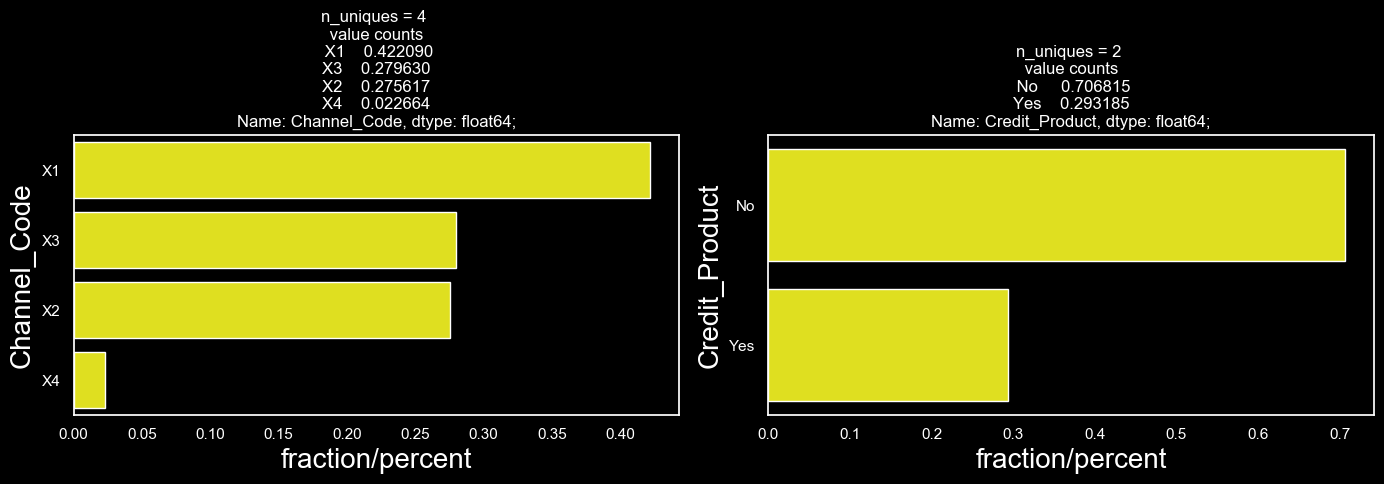

In [608]:
UVA_category(credit_card,["Channel_Code","Credit_Product"])
plt.style.use('dark_background')
plt.grid(False)

*    **Channel_Code:**
    *    Majority of customers are acqurired through X1. Very few customers are gainedfrom X4.
*    **Credit_Product:**
    *    70% customers do not have credit products.

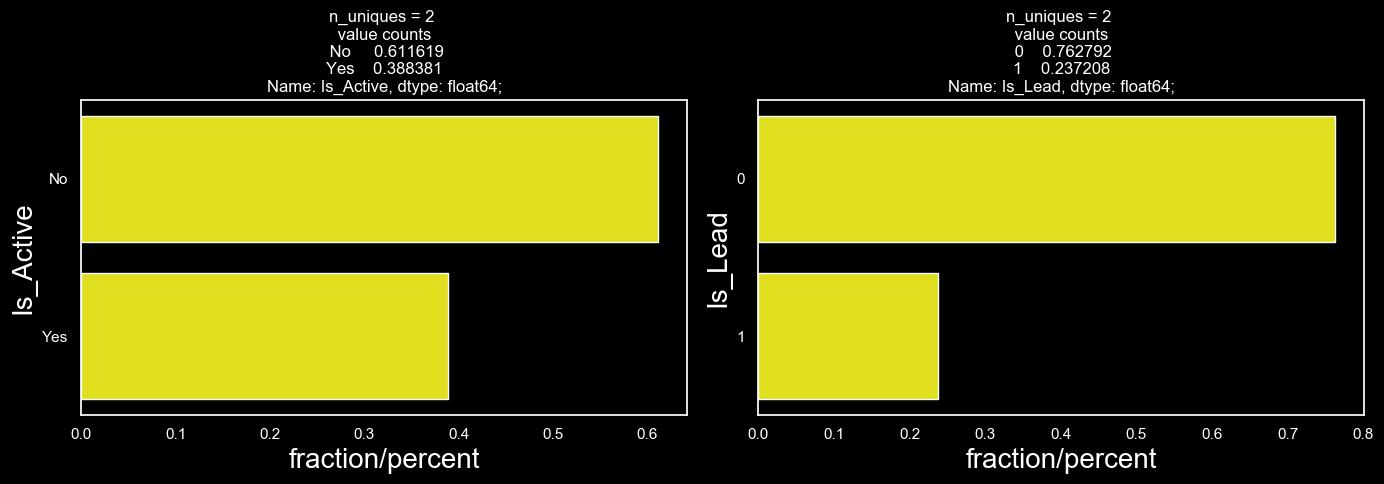

In [609]:
UVA_category(credit_card,["Is_Active","Is_Lead"])
#plt.style.use('dark_background')

*    **Is_Active:**
    *    61% of customers are not active users.
*    **Is_Lead:**
    *    A very mall majority (23%) of customers are considered lead

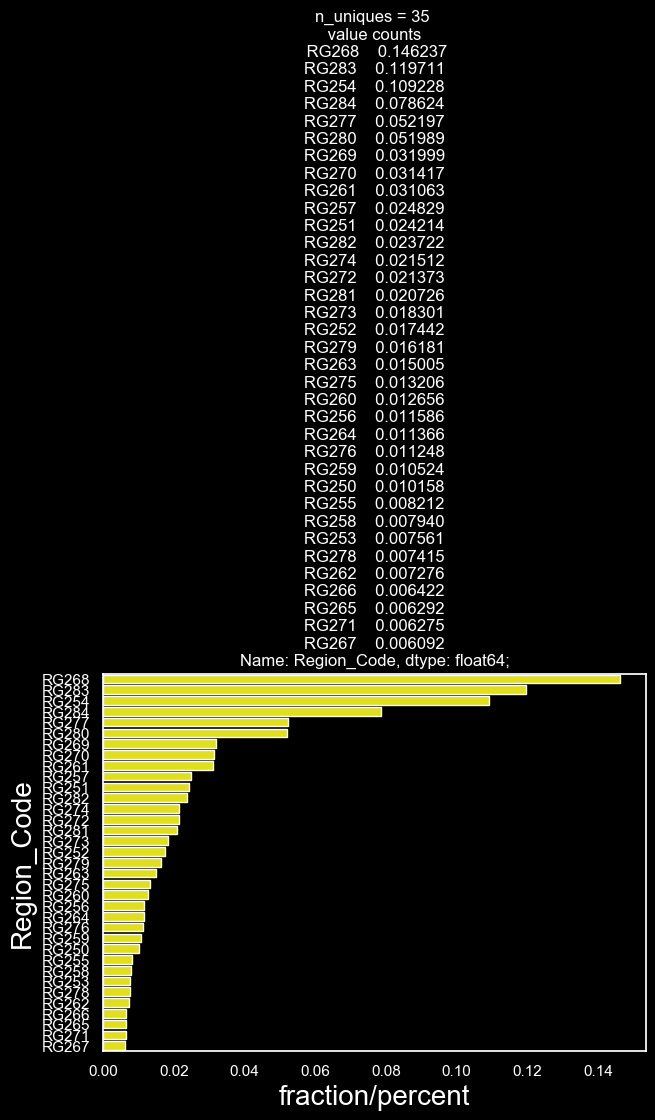

In [610]:
UVA_category(credit_card,["Region_Code"])
plt.style.use('dark_background')

**Summary:**
for "region code", there are 35 categories. There is clear relation that some region codes are more popular with customers and this trend decreases rapidly.

## Univariate Analysis: Outliers

In [529]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

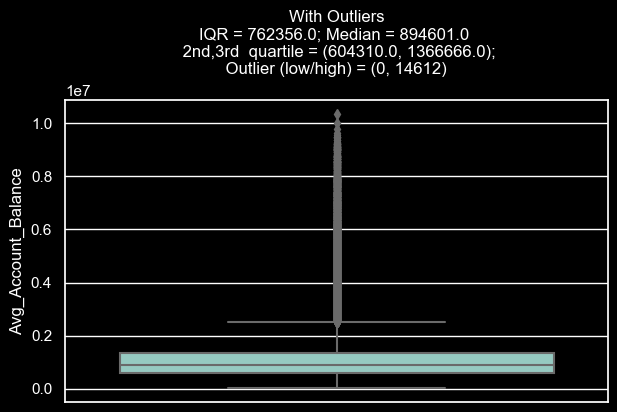

In [530]:
UVA_outlier(credit_card,["Avg_Account_Balance"])

## Bivariate Analysis : Numerical-Numerical

### Correlation Matrix

In [531]:
numerical = credit_card.select_dtypes(include=['int64'])

# calculating correlation
correlation = numerical.corr()
correlation

,Age,Vintage,Avg_Account_Balance
Age,1.000000,0.631242,0.145232
Vintage,0.631242,1.000000,0.167433
Avg_Account_Balance,0.145232,0.167433,1.000000


In [532]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
credit_card_encoded = copy.deepcopy(credit_card)
credit_card_encoded.loc[:,['Gender','Occupation','Channel_Code','Credit_Product','Is_Active','Is_Lead']] = credit_card_encoded.loc[:,['Gender','Occupation','Channel_Code','Credit_Product','Is_Active','Is_Lead']].apply(LabelEncoder().fit_transform) 

In [533]:
credit_card_encoded.drop(["Region_Code"],axis=1,inplace=True)
credit_card_encoded.head()

,ID,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,1,2,43,0,1045696,0,0
1,IDD62UNG,0,30,2,0,32,0,581988,0,0
2,HD3DSEMC,0,56,3,2,26,0,1484315,1,0
3,BF3NC7KV,1,34,2,0,19,0,470454,0,0
4,TEASRWXV,0,30,2,0,33,0,886787,0,0


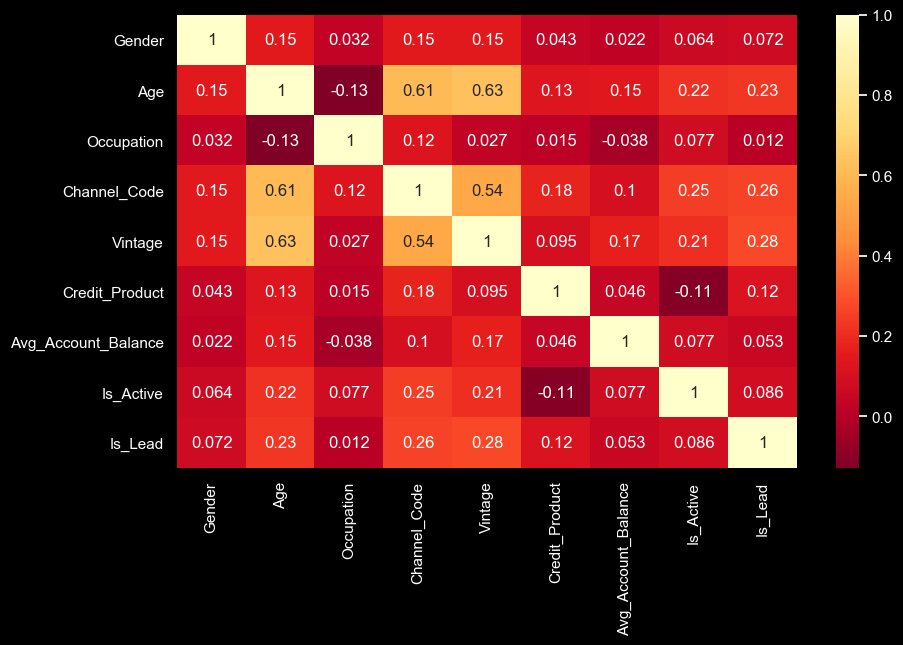

In [534]:
plt.figure(figsize=(10,6), dpi=100)
sns.heatmap(credit_card_encoded.corr(),annot=True,cmap="YlOrRd_r")
plt.style.use('dark_background')

**Inferences:**
Age and Vintage have moderate correlation as weel as age and channel code

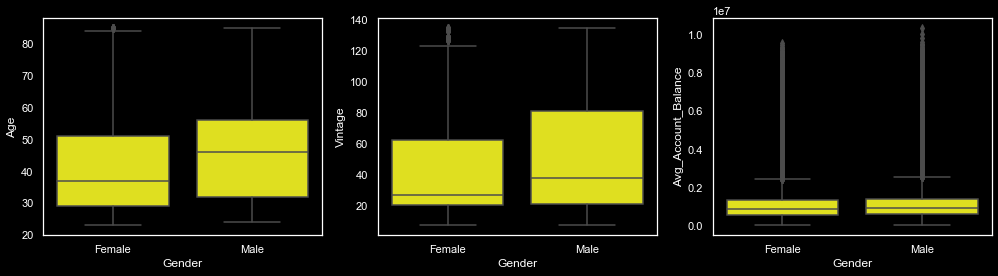

In [612]:
plt.subplots(figsize=(17, 4))

plt.subplot(1, 3, 1)
sns.boxplot( x='Gender',
    y='Age',
    data=credit_card,color='yellow')
plt.grid(False)
plt.subplot(1, 3, 2)
sns.boxplot( x='Gender',
    y='Vintage',
    data=credit_card,color='yellow')
plt.grid(False)
plt.subplot(1, 3, 3)
sns.boxplot( x='Gender',
    y='Avg_Account_Balance',
    data=credit_card,color='yellow')
plt.style.use('dark_background')
plt.grid(False)

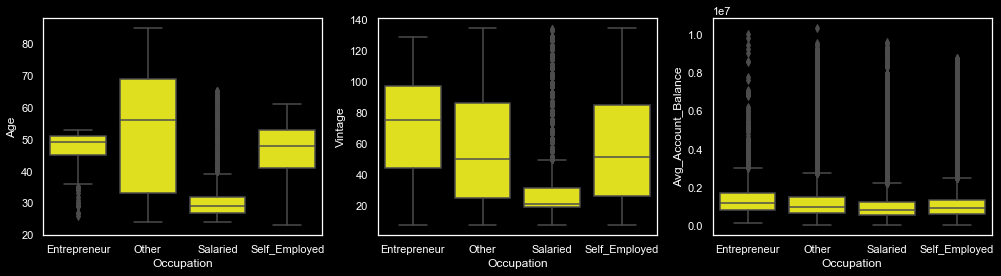

In [613]:
plt.subplots(figsize=(17, 4))

plt.subplot(1, 3, 1)
sns.boxplot( x='Occupation',
    y='Age',
    data=credit_card,color='yellow')
plt.grid(False)
plt.subplot(1, 3, 2)
sns.boxplot( x='Occupation',
    y='Vintage',
    data=credit_card,color='yellow')
plt.grid(False)
plt.subplot(1, 3, 3)
sns.boxplot( x='Occupation',
    y='Avg_Account_Balance',
    data=credit_card,color='yellow')
plt.style.use('dark_background')
plt.grid(False)

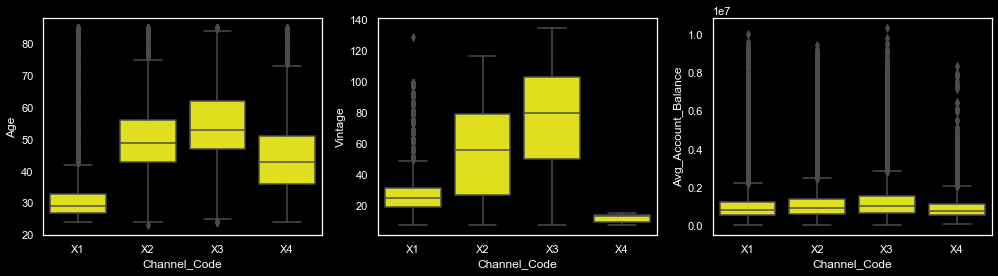

In [614]:
plt.subplots(figsize=(17, 4))

plt.subplot(1, 3, 1)
sns.boxplot( x='Channel_Code',
    y='Age',
    data=credit_card,color='yellow')
plt.grid(False)
plt.subplot(1, 3, 2)
sns.boxplot( x='Channel_Code',
    y='Vintage',
    data=credit_card,color='yellow')
plt.grid(False)
plt.subplot(1, 3, 3)
sns.boxplot( x='Channel_Code',
    y='Avg_Account_Balance',
    data=credit_card,color='yellow')
plt.style.use('dark_background')
plt.grid(False)

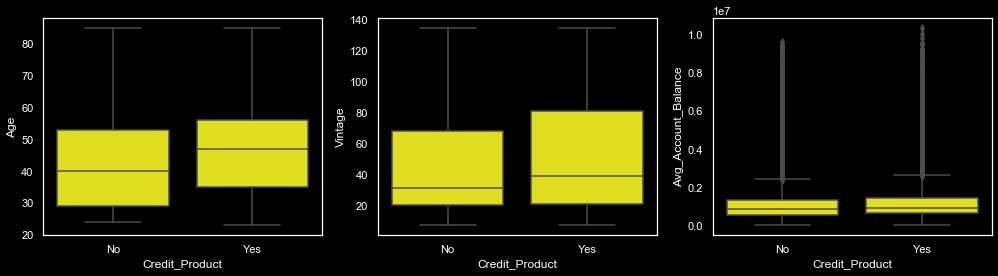

In [615]:
plt.subplots(figsize=(17, 4))

plt.subplot(1, 3, 1)
sns.boxplot( x='Credit_Product',
    y='Age',
    data=credit_card,color='yellow')
plt.grid(False)
plt.subplot(1, 3, 2)
sns.boxplot( x='Credit_Product',
    y='Vintage',
    data=credit_card,color='yellow')
plt.grid(False)
plt.subplot(1, 3, 3)
sns.boxplot( x='Credit_Product',
    y='Avg_Account_Balance',
    data=credit_card,color='yellow')
plt.style.use('dark_background')
plt.grid(False)


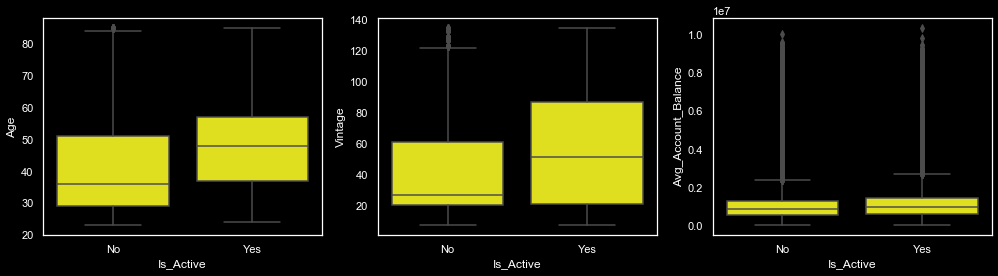

In [616]:
plt.subplots(figsize=(17, 4))

plt.subplot(1, 3, 1)
sns.boxplot( x='Is_Active',
    y='Age',
    data=credit_card,color='yellow')
plt.grid(False)
plt.subplot(1, 3, 2)
sns.boxplot( x='Is_Active',
    y='Vintage',
    data=credit_card,color='yellow')
plt.grid(False)
plt.subplot(1, 3, 3)
sns.boxplot( x='Is_Active',
    y='Avg_Account_Balance',
    data=credit_card,color='yellow')
plt.grid(False)

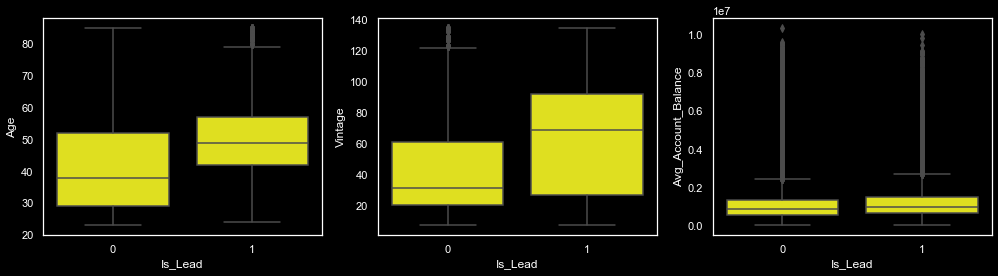

In [617]:
plt.subplots(figsize=(17, 4))

plt.subplot(1, 3, 1)
sns.boxplot( x='Is_Lead',
    y='Age',
    data=credit_card,color='yellow')
plt.grid(False)
plt.subplot(1, 3, 2)
sns.boxplot( x='Is_Lead',
    y='Vintage',
    data=credit_card,color='yellow')
plt.grid(False)
plt.subplot(1, 3, 3)
sns.boxplot( x='Is_Lead',
    y='Avg_Account_Balance',
    data=credit_card,color='yellow')
plt.grid(False)

<Figure size 840x560 with 0 Axes>

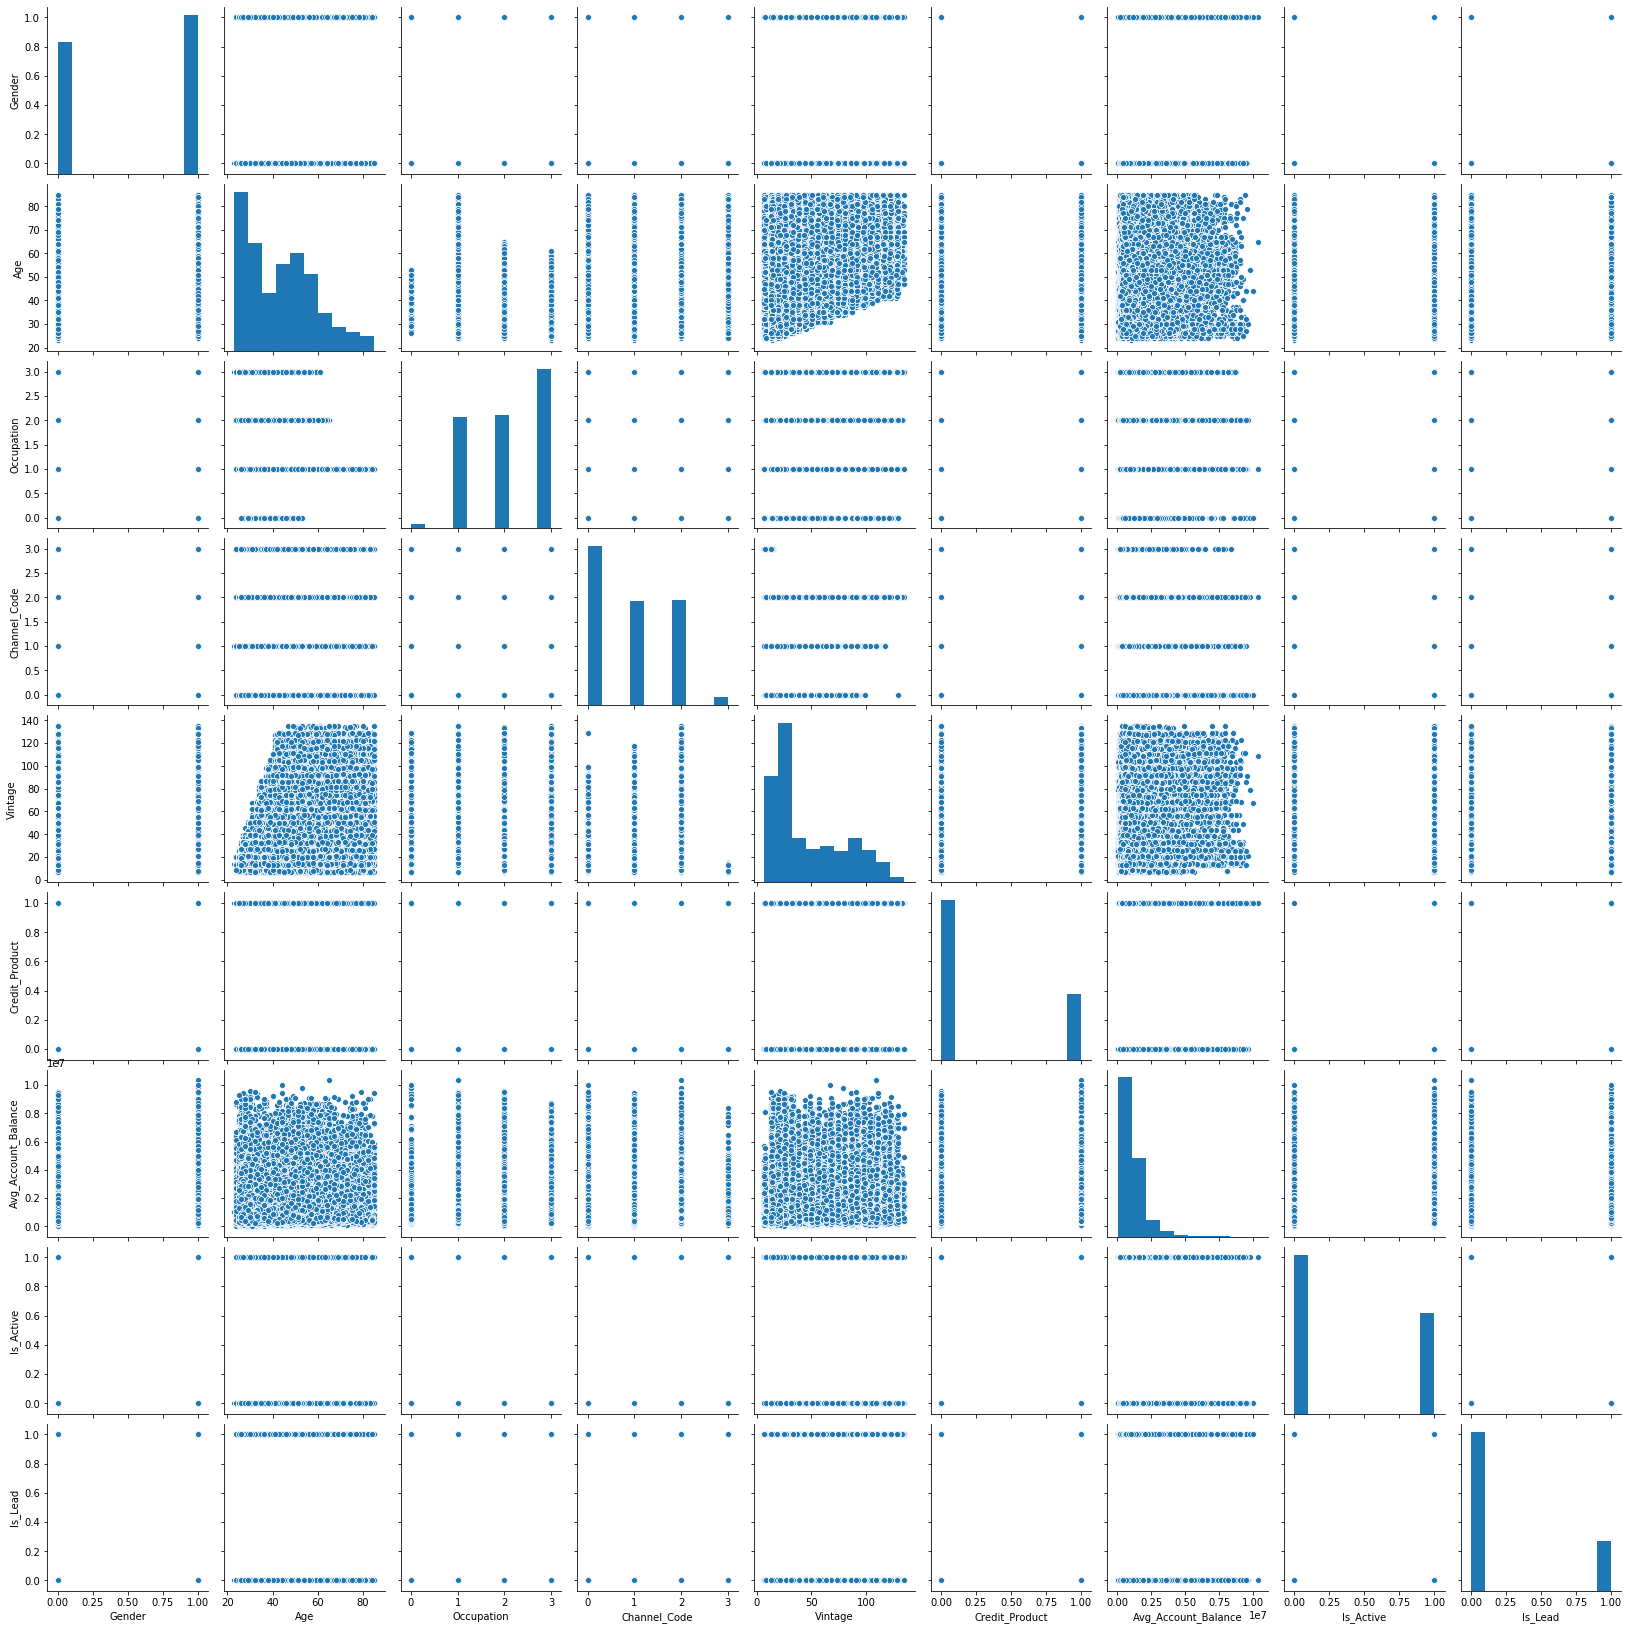

In [167]:
plt.figure(dpi=140)
sns.pairplot(credit_card_encoded)

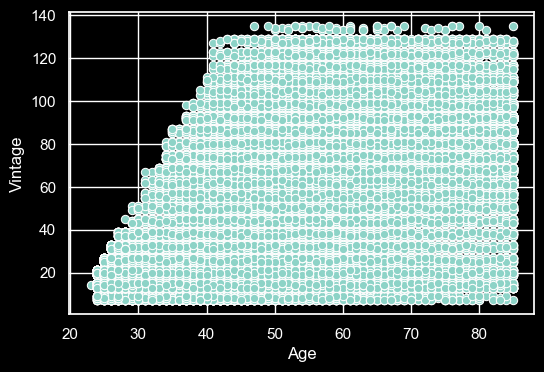

In [545]:
plt.figure(dpi=100)
sns.scatterplot(credit_card_encoded['Age'], credit_card_encoded['Vintage'])

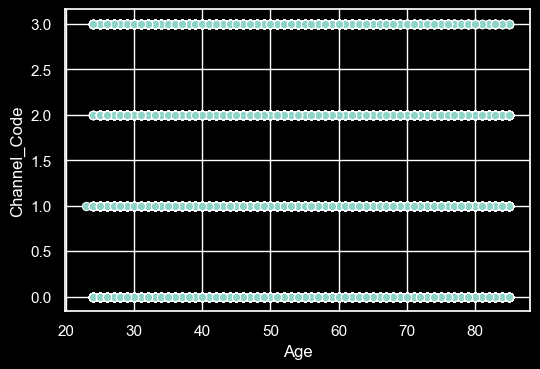

In [546]:
plt.figure(dpi=100)
sns.scatterplot(credit_card_encoded['Age'], credit_card_encoded['Channel_Code'])

## Bivariate Analysis: Categorical-Categorical variables

#### List of Hypothesis to check under this combination
1.   Are females less likely to be lead target than males?
2.   Are young customers more likely to lead target?
3.   Are customers of different occupations more likely to be lead target?
4.   Customers acquired through different channel code more likely to be lead target?
5.   Are customers who are more active are more likely to be lead target?
6.   Customers having active credit product more likely to be lead target?
7.   Possibility that cities and branch code with very few accounts may lead to churning.

In [619]:
bins = [18, 40, 55, 70, 120]
labels = ['18-39','40-54', '55-69', '70+']
credit_card['agerange'] = pd.cut(credit_card_encoded.Age, bins, labels = labels,include_lowest = True)

bins = [7,46, 77,110, 140]
labels = ['7-45','46-76', '77-109', '110+']
credit_card['vintage_months'] = pd.cut(credit_card_encoded.Vintage, bins, labels = labels,include_lowest = True)

bins = [100000,1000000, 5000000,10000000]
labels = ['low balance','medium balance','high balance']
credit_card['balance_status'] = pd.cut(credit_card_encoded.Avg_Account_Balance, bins, labels = labels,include_lowest = True)



credit_card.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,agerange,vintage_months,balance_status
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,70+,7-45,medium balance
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,18-39,7-45,low balance
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,55-69,7-45,medium balance
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,18-39,7-45,low balance
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,18-39,7-45,low balance


In [620]:
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data,color="yellow")
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))
  plt.grid(b=None)
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()  
  plt.grid(b=None)

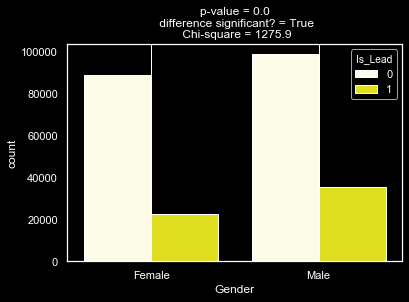

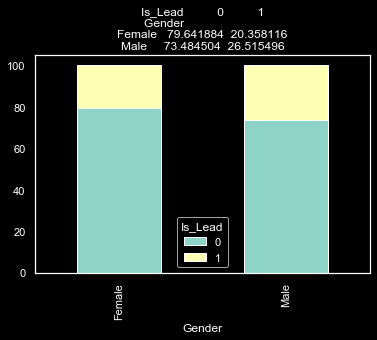

In [621]:
BVA_categorical_plot(credit_card, 'Is_Lead', 'Gender')
plt.style.use('dark_background')


**RESULTS:**

- By the p_value of Chi square test, we can assume that the difference between the males and females lead customer is significant (They are independent)/ the gender has a significant impact on the lead target.
- By the frequecies, we can assume that males are more likely to be lead target.

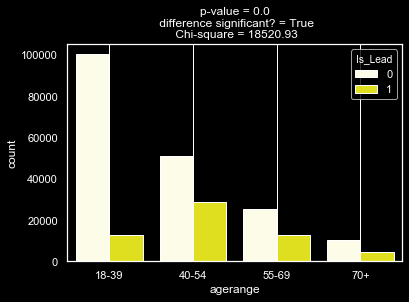

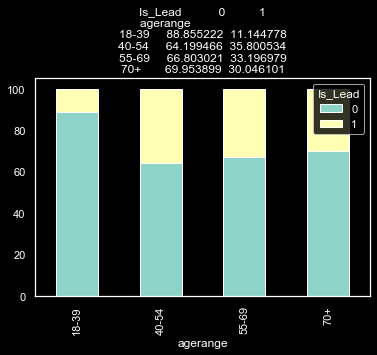

In [622]:
BVA_categorical_plot(credit_card, 'Is_Lead', 'agerange')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the Age has a significant impact on the lead target.
- By the frequency, we can assume that customer between the age range of 40-70 are more likely to be lead target than customer betweenage range of 18-40 and 70+ adults.

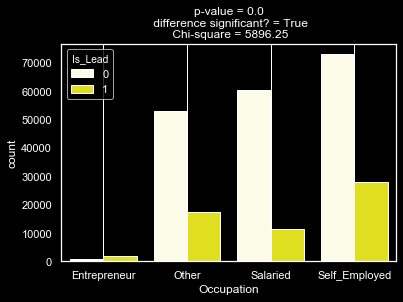

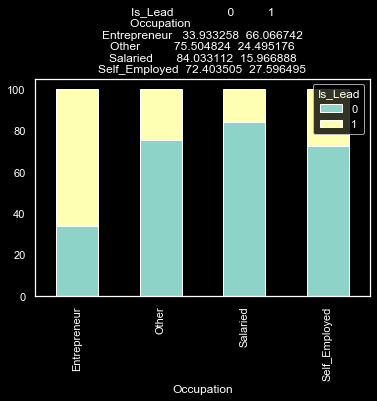

In [623]:
BVA_categorical_plot(credit_card, 'Is_Lead', 'Occupation')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the Occupation has a significant impact on the lead target.
- By the frequency, we can assume that entrepreneurs are more likely to become lead tagets than self employed.

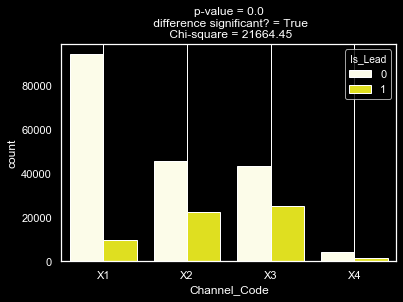

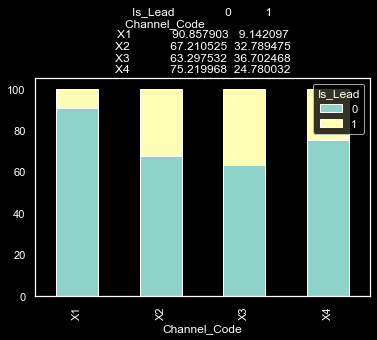

In [624]:
BVA_categorical_plot(credit_card, 'Is_Lead', 'Channel_Code')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the Channel_Code has a significant impact on the lead target.
- By the frequency, we can assume that customers acquired from X3 channel are more likely to become lead tagets than customers coming from X2 channel.

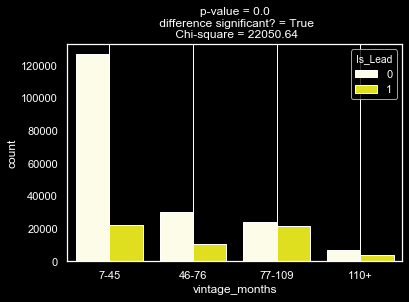

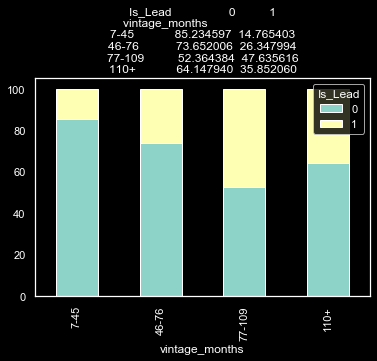

In [625]:
BVA_categorical_plot(credit_card, 'Is_Lead', 'vintage_months')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the vintage_months has a significant impact on the lead target.
- By the frequency, we can assume that customers who have been with the bank fro 77-109 months (6-9 years) are more likely to become lead tagets than customers who have been with the bank for more tha 109 months (9 years and more).

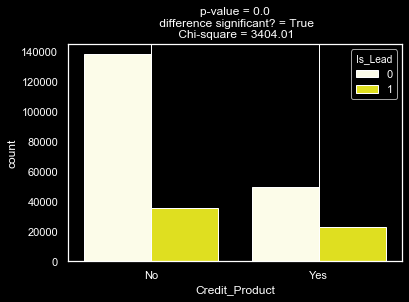

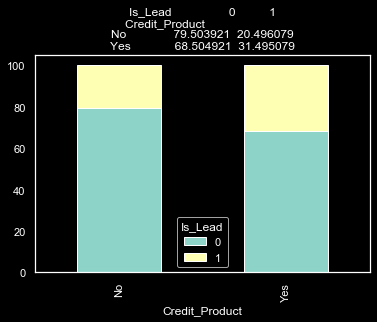

In [626]:
BVA_categorical_plot(credit_card, 'Is_Lead', 'Credit_Product')

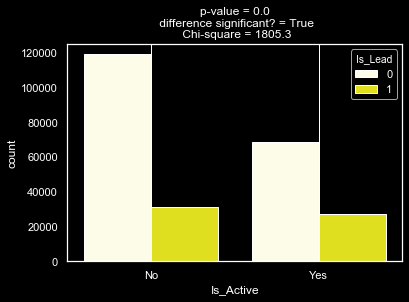

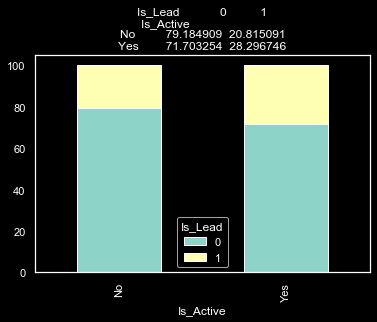

In [627]:
BVA_categorical_plot(credit_card, 'Is_Lead', 'Is_Active')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that credit_product and Is_Active has a significant impact on the lead target.
- By the frequency, we can assume that customers who are active and have credit product are more likely to become lead tagets.

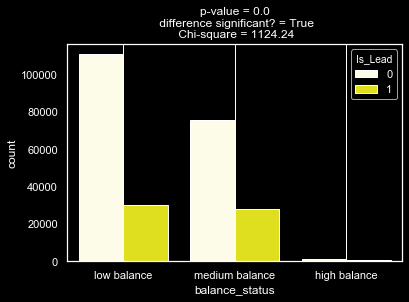

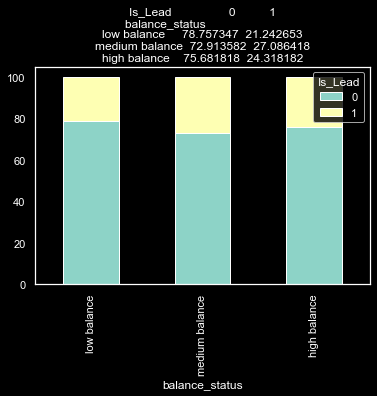

In [632]:
BVA_categorical_plot(credit_card, 'Is_Lead', 'balance_status')

## Bivariate Analysis: Continuous-Categorical variables

#### LIST OF HYPOTHESIS TO CHECK

* Are the average `Age` of non lead customer equal to that of lead target customer?
* Are the average `Time of relationship (Vintage)` of non lead customer equal to that of lead target customer?
* Are the average `Account Balance` of non lead customer equal to that of lead target customer?


In [628]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def Bivariate_cont_cat(data, cont, cat, category):
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  t_p_val = round(TwoSampT(m1, m2, std1, std2, n1, n2),4)
  z_p_val = round(TwoSampZ(m1, m2, std1, std2, n1, n2),4)
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  table = round(table,2)
  plt.figure(figsize = (15,6), dpi=140)
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not{}'.format(category)], [m1, m2],color='yellow')
  plt.grid(False)
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data,color='yellow')
  plt.grid(False)
  plt.title('categorical boxplot')

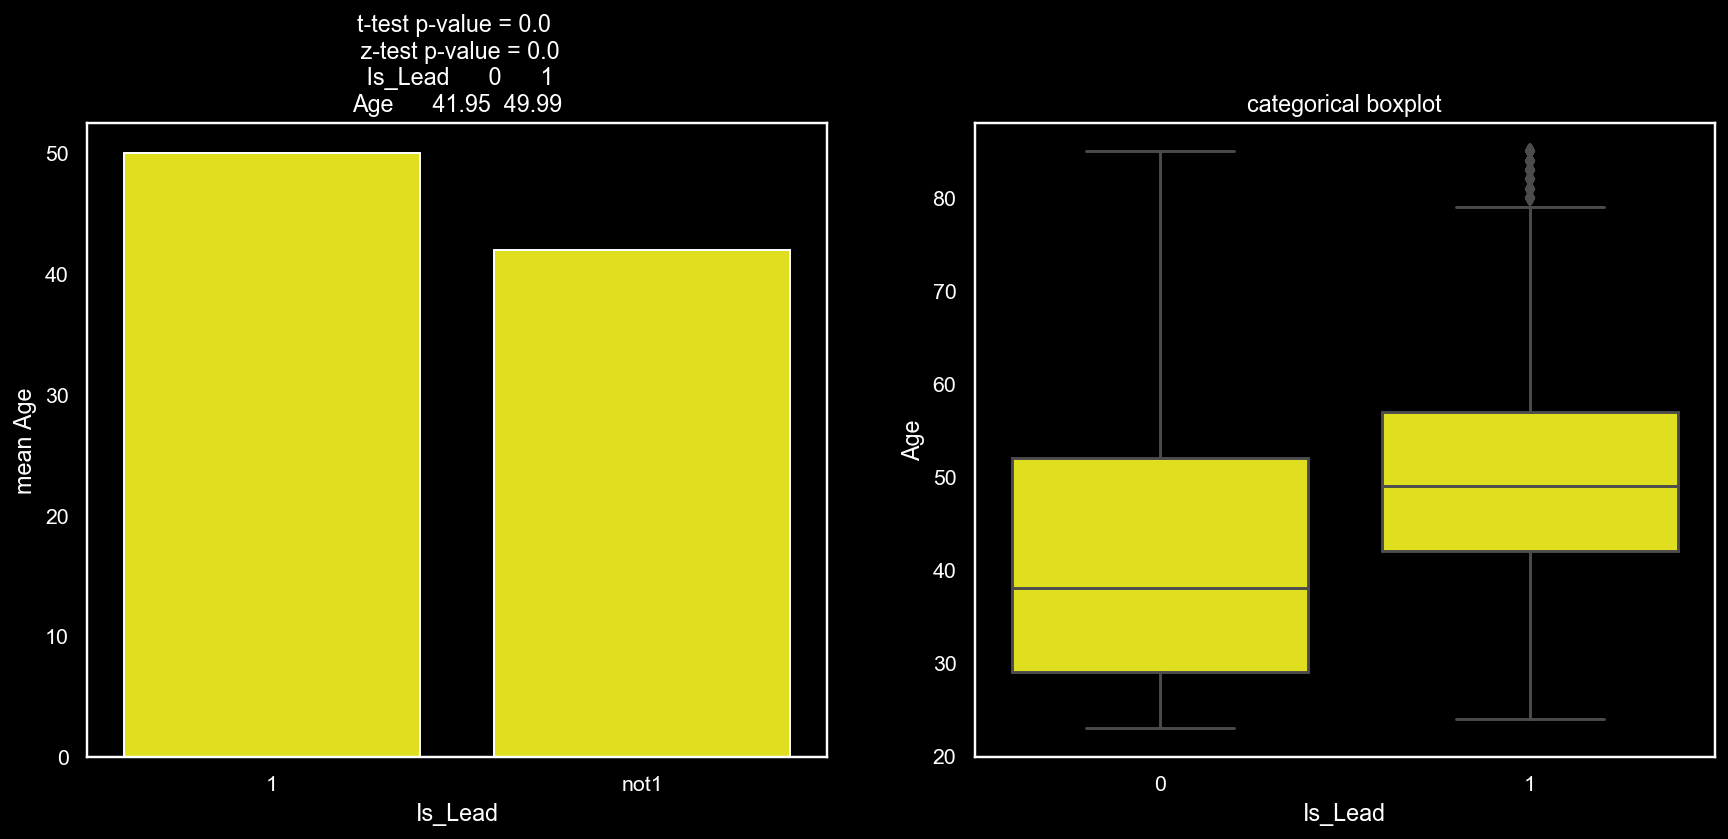

In [629]:
Bivariate_cont_cat(credit_card, 'Age', 'Is_Lead',1)

**RESULTS:**

There is significant difference in the average age of lead customers and non lead customers.

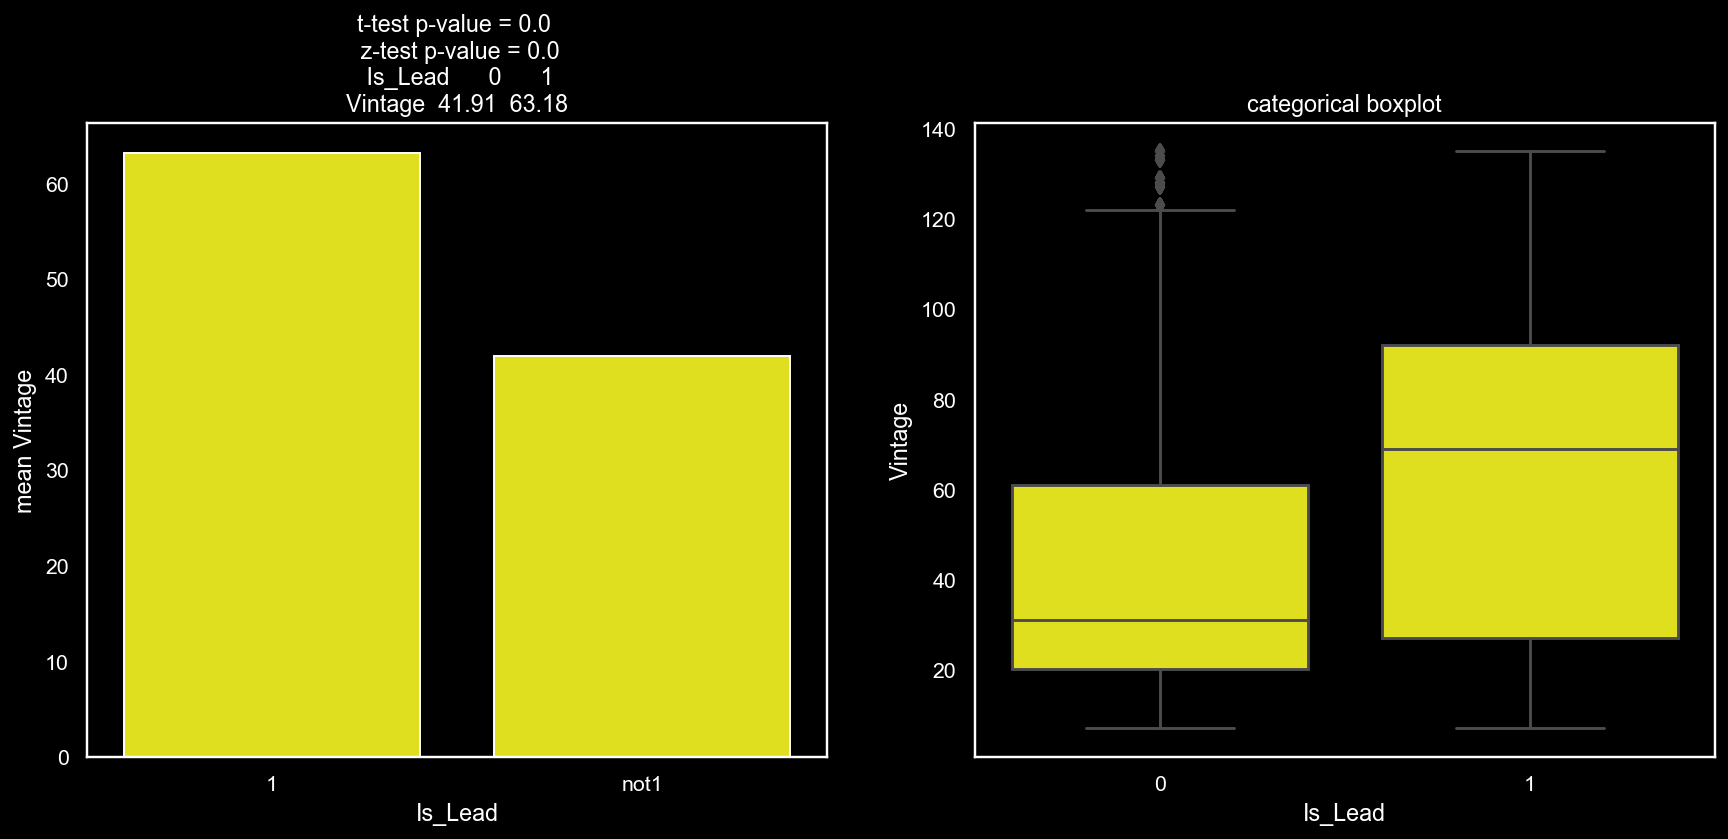

In [630]:
Bivariate_cont_cat(credit_card, 'Vintage', 'Is_Lead',1)

**RESULTS:**

There is a significant diference between the average `Time of relationship (Vintage)` of non lead customer and of lead target customer. We can see that the average of `Time of relationship (Vintage)` of non lead customer is less than that of lead target customer.

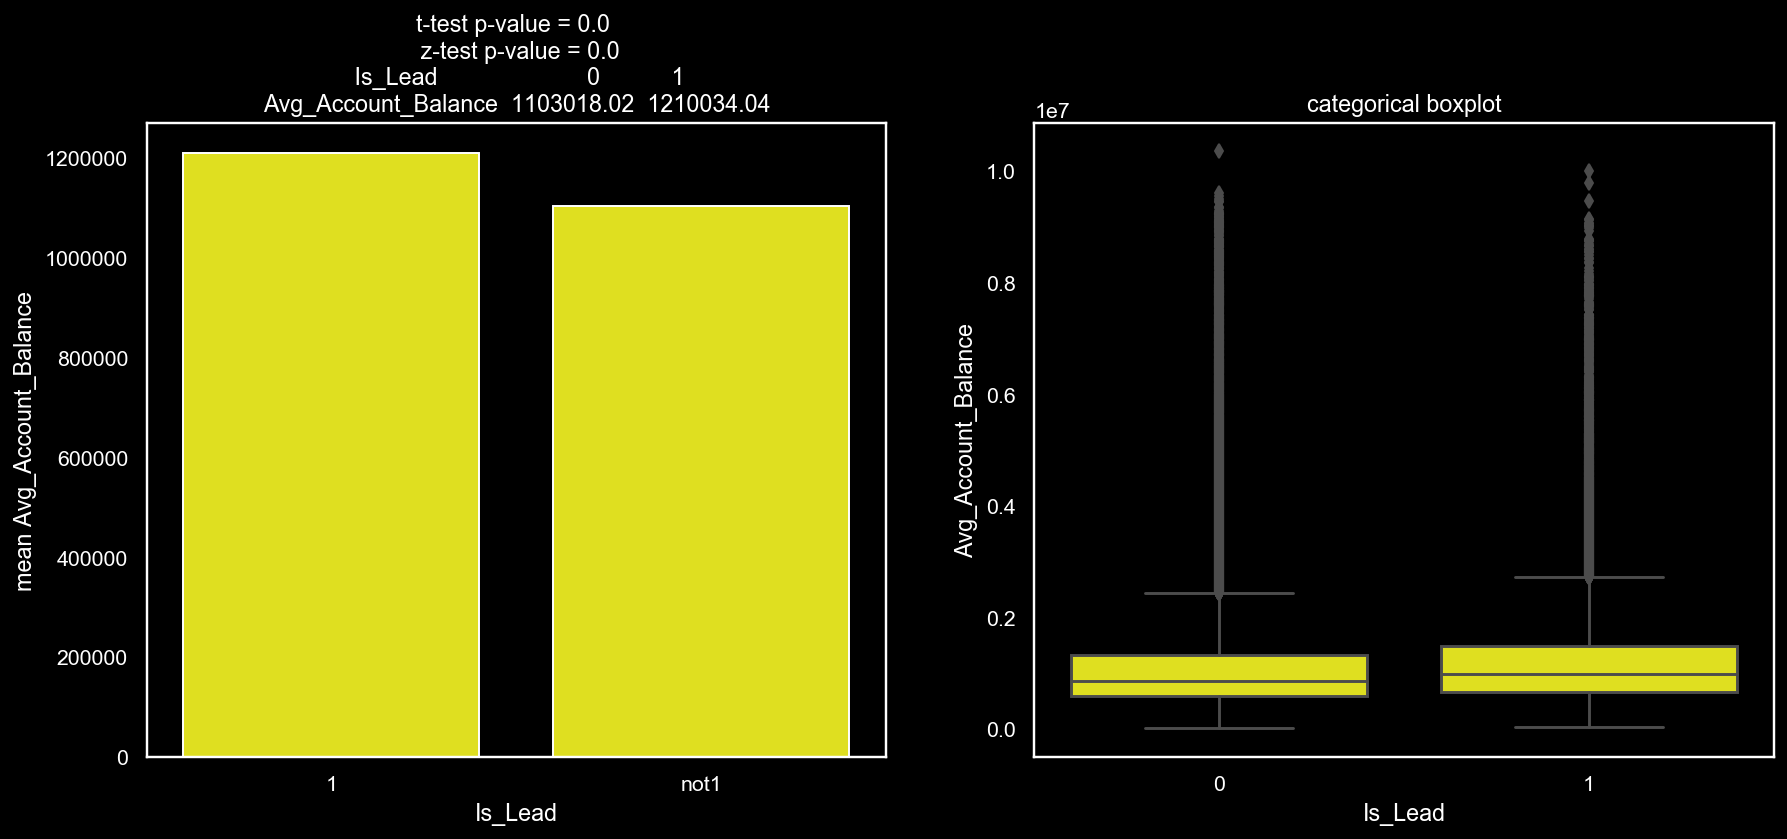

In [631]:
Bivariate_cont_cat(credit_card, 'Avg_Account_Balance', 'Is_Lead',1)

**RESULTS:**

There is a significant diference between the average account balance of non lead customer and of lead target customer. We can see that the average account balance of non lead customer is less than that of lead target customer.

### 2.3. MULTIVARIATE ANALYSIS

We will use Pivot table to comply with the objective of identifying the factors associated with customer attrition using multiple categorical features.

In [305]:
Target_variable=credit_card["Is_Lead"].isin([1])
new_df=credit_card[Target_variable]
new_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,agerange,vintage_months,balance_status
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,No,1056750,Yes,1,55-69,7-45,medium balance
15,UJ2NJKKL,Male,33,RG268,Self_Employed,X2,69,No,517063,Yes,1,18-39,46-76,low balance
16,CNGSPYWS,Female,46,RG268,Other,X3,97,Yes,2282502,No,1,40-54,77-109,medium balance
17,VH7NBNNQ,Female,59,RG283,Other,X3,15,Yes,2384692,No,1,55-69,7-45,medium balance
20,7PMYNWB3,Male,44,RG269,Self_Employed,X2,19,Yes,1001650,No,1,40-54,7-45,medium balance


In [309]:
new_df.pivot_table('Is_Lead', ['Gender', 'agerange'], 'balance_status', aggfunc='count')

balance_status   low balance  medium balance  high balance
Gender agerange                                           
Female 18-39            3870            2194            41
       40-54            5354            5567            73
       55-69            1561            2235            44
       70+               787             956            19
Male   18-39            4023            2399            48
       40-54            9210            8242            97
       55-69            3939            4804            77
       70+              1110            1596            29

**RESULTS:**

- From the above table we can see that the highest number of lead customers are those male adults between the age of 40-55 that have low balance.
- For females the maximum number of leads are in between the age range of 45-55 that have medium balance.

In [325]:
new_df.pivot_table('Is_Lead', ['Gender', 'Occupation'], 'balance_status', aggfunc='count')

balance_status        low balance  medium balance  high balance
Gender Occupation                                              
Female Entrepreneur           233             411             7
       Other                 2996            3298            46
       Salaried              2912            2124            46
       Self_Employed         5431            5119            78
Male   Entrepreneur           445             647            18
       Other                 5056            5695            97
       Salaried              3432            2926            52
       Self_Employed         9349            7773            84

**RESULTS:**

- From the above table we can see that the highest number of lead customers are those self employed males and females that have low balance status. 

In [335]:
new_df.pivot_table('Is_Lead', ['Gender', 'vintage_months'], 'balance_status', aggfunc='count')

balance_status         low balance  medium balance  high balance
Gender vintage_months                                           
Female 7-45                   6116            3585            58
       46-76                  2118            2258            35
       77-109                 3048            4286            65
       110+                    290             823            19
Male   7-45                   7564            4529            65
       46-76                  3237            3079            37
       77-109                 6580            7678           108
       110+                    901            1755            41

**RESULTS:**

- From the above table we can see that the highest number of lead customers are those male adults who are with the bank for 6-9 year(77-109 months) and have medium balance.
- For females highest number of lead customers are those who are with the bank for 3 year(7-45 months) and have low balance.

In [327]:
new_df.pivot_table('Is_Lead', ['Gender', 'Occupation'], 'Channel_Code', aggfunc='count')

Channel_Code            X1    X2    X3   X4
Gender Occupation                          
Female Entrepreneur     54   215   372   10
       Other           920  2177  3117  126
       Salaried       2895   954  1140   94
       Self_Employed  1038  4427  4844  322
Male   Entrepreneur     56   462   576   17
       Other           886  4068  5694  201
       Salaried       2566  1760  1957  130
       Self_Employed  1067  8144  7519  480

**RESULTS:**

- From the above table we can see that the highest number of lead customers are those self employeed males and females who were acquired through X2 and X3 channnels.

In [332]:
new_df.pivot_table('Is_Lead', ['Gender', 'Occupation'], 'vintage_months', aggfunc='count')

vintage_months        7-45  46-76  77-109  110+
Gender Occupation                              
Female Entrepreneur    154    149     281    67
       Other          1917   1412    2575   436
       Salaried       3773    478     686   146
       Self_Employed  3918   2372    3858   483
Male   Entrepreneur    221    226     552   112
       Other          2535   2008    5187  1119
       Salaried       3777    715    1554   367
       Self_Employed  5630   3405    7076  1099

**RESULTS:**

- From the above table we can see that the highest number of lead customers are those self employed male who are with the bank for 6-9 year(77-109 months).
- For females highest number of lead customers are those self employed who are with the bank for 3 year(7-45 months).

In [328]:
new_df.pivot_table('Is_Lead', ['Gender', 'agerange'], 'Channel_Code', aggfunc='count')

Channel_Code       X1    X2    X3   X4
Gender agerange                       
Female 18-39     3573  1499   794  239
       40-54      790  4511  5465  232
       55-69      349  1204  2223   64
       70+        195   559   991   17
Male   18-39     3128  2070   951  325
       40-54      828  8359  7983  384
       55-69      407  3171  5152   90
       70+        212   834  1660   29

**RESULTS:**

- From the above table we can see that the highest number of lead customers are those male adults who were acquired from X2 channel and are in between the age range of 40-54.
- For females highest number of lead customers are those who were acquired from X3 channel and are in the age range of 40-54.

In [362]:
new_df.pivot_table('Is_Lead', ['Gender', 'agerange'], 'vintage_months', aggfunc='count')

vintage_months     7-45   46-76  77-109    110+
Gender agerange                                
Female 18-39     5493.0   455.0   157.0     NaN
       40-54     3160.0  2694.0  4545.0   599.0
       55-69      827.0   809.0  1813.0   391.0
       70+        282.0   453.0   885.0   142.0
Male   18-39     5708.0   540.0   226.0     NaN
       40-54     4803.0  3732.0  7864.0  1155.0
       55-69     1349.0  1542.0  4664.0  1265.0
       70+        303.0   540.0  1615.0   277.0

**RESULTS:**

- From the above table we can see that the highest number of lead customers are those male adults who are with the bank for 6-9 year(77-109 months) and are in the age range of 40-54.
- For females highest number of lead customers are those who are with the bank for 3 year(7-45 months) and are in the age range of 18-39..
- there are no customers between the age of 18-39 who are with the bank for more tha 9 years.

In [337]:
new_df.pivot_table('Is_Lead', ['Gender', 'agerange'],['Occupation', 'vintage_months'], aggfunc='countare in the age range of 40-54.')

Occupation      Entrepreneur                       Other                 \
vintage_months          7-45  46-76 77-109   110+   7-45  46-76  77-109   
Gender agerange                                                           
Female 18-39            26.0   12.0    4.0    NaN  691.0   82.0    24.0   
       40-54           128.0  137.0  277.0   67.0  556.0  488.0   810.0   
       55-69             NaN    NaN    NaN    NaN  388.0  389.0   856.0   
       70+               NaN    NaN    NaN    NaN  282.0  453.0   885.0   
Male   18-39            24.0   19.0   13.0    NaN  711.0   82.0    34.0   
       40-54           197.0  207.0  539.0  112.0  860.0  640.0  1270.0   
       55-69             NaN    NaN    NaN    NaN  661.0  746.0  2268.0   
       70+               NaN    NaN    NaN    NaN  303.0  540.0  1615.0   

Occupation             Salaried                      Self_Employed          \
vintage_months    110+     7-45  46-76 77-109   110+          7-45   46-76   
Gender agerange                                                              
Female 18-39       NaN   3421.0   99.0   25.0    NaN        1355.0   262.0   
       40-54     114.0    247.0  271.0  463.0   86.0        2229.0  1798.0   
       55-69     180.0    105.0  108.0  198.0   60.0         334.0   312.0   
       70+       142.0      NaN    NaN    NaN    NaN           NaN     NaN   
Male   18-39       NaN   3251.0  147.0   39.0    NaN        1722.0   292.0   
       40-54     194.0    374.0  402.0  959.0  213.0        3372.0  2483.0   
       55-69     648.0    152.0  166.0  556.0  154.0         536.0   630.0   
       70+       277.0      NaN    NaN    NaN    NaN           NaN     NaN   

Occupation                      
vintage_months   77-109   110+  
Gender agerange                 
Female 18-39      104.0    NaN  
       40-54     2995.0  332.0  
       55-69      759.0  151.0  
       70+          NaN    NaN  
Male   18-39      140.0    NaN  
       40-54     5096.0  636.0  
       55-69     1840.0  463.0  
       70+          NaN    NaN

**RESULTS:**

- From the above table we can see that the highest number of lead customers are those self employed male adults who are with the bank for 3 year(7-45 months) and are in the age range of 40-54.
- For females highest number of lead customers are those who are salaried and are with the bank for 3 year(7-45 months) and are in the age range of 18-39.
- There are no entrepreneurs from 55 and above
- customers who are 70 and above are either not associated with bank or come under different category like retired.

In [338]:
new_df.pivot_table('Is_Lead', ['Gender', 'agerange'],['balance_status', 'vintage_months'], aggfunc='count')

balance_status  low balance                        medium balance          \
vintage_months         7-45   46-76  77-109   110+           7-45   46-76   
Gender agerange                                                             
Female 18-39         3576.0   232.0    62.0    NaN         1882.0   218.0   
       40-54         1957.0  1333.0  1920.0  144.0         1185.0  1348.0   
       55-69          437.0   343.0   671.0  110.0          386.0   454.0   
       70+            146.0   210.0   395.0   36.0          132.0   238.0   
Male   18-39         3679.0   254.0    90.0    NaN         1988.0   277.0   
       40-54         3028.0  2025.0  3765.0  392.0         1758.0  1691.0   
       55-69          708.0   742.0  2075.0  414.0          631.0   791.0   
       70+            149.0   216.0   650.0   95.0          152.0   320.0   

balance_status                 high balance                     
vintage_months   77-109   110+         7-45 46-76 77-109  110+  
Gender agerange                                                 
Female 18-39       94.0    NaN         35.0   5.0    1.0   NaN  
       40-54     2588.0  446.0         15.0  13.0   36.0   9.0  
       55-69     1121.0  274.0          4.0  12.0   21.0   7.0  
       70+        483.0  103.0          4.0   5.0    7.0   3.0  
Male   18-39      134.0    NaN         37.0   9.0    2.0   NaN  
       40-54     4046.0  747.0         16.0  15.0   50.0  16.0  
       55-69     2550.0  832.0         10.0   9.0   39.0  19.0  
       70+        948.0  176.0          2.0   4.0   17.0   6.0

**RESULTS:**

- From the above table we can see that the highest number of lead customers are those male adults who are with the bank for 3 year(7-45 months) and are in the age range of 40-54 and have medium balance.
- For females highest number of lead customers are those who are with the bank for 3 year(7-45 months) and are in the age range of 18-39 and have low balance.
- there are no customers between the age of 18-39 who are with the bank for more tha 9 years.
- frequency of customers who are 70 and above have balance are very low

In [339]:
new_df.pivot_table('Is_Lead', ['Gender', 'agerange'],['Occupation', 'balance_status'], aggfunc='count')

Occupation      Entrepreneur                                   Other  \
balance_status   low balance medium balance high balance low balance   
Gender agerange                                                        
Female 18-39            17.0           25.0          NaN       505.0   
       40-54           216.0          386.0          7.0       982.0   
       55-69             NaN            NaN          NaN       722.0   
       70+               NaN            NaN          NaN       787.0   
Male   18-39            32.0           24.0          NaN       523.0   
       40-54           413.0          623.0         18.0      1548.0   
       55-69             NaN            NaN          NaN      1875.0   
       70+               NaN            NaN          NaN      1110.0   

Occupation                                     Salaried                 \
balance_status  medium balance high balance low balance medium balance   
Gender agerange                                                          
Female 18-39             289.0          3.0      2281.0         1238.0   
       40-54             981.0          5.0       460.0          593.0   
       55-69            1072.0         19.0       171.0          293.0   
       70+               956.0         19.0         NaN            NaN   
Male   18-39             299.0          5.0      2100.0         1306.0   
       40-54            1399.0         16.0       877.0         1055.0   
       55-69            2401.0         47.0       455.0          565.0   
       70+              1596.0         29.0         NaN            NaN   

Occupation                   Self_Employed                              
balance_status  high balance   low balance medium balance high balance  
Gender agerange                                                         
Female 18-39            26.0        1067.0          642.0         12.0  
       40-54            13.0        3696.0         3607.0         48.0  
       55-69             7.0         668.0          870.0         18.0  
       70+               NaN           NaN            NaN          NaN  
Male   18-39            29.0        1368.0          770.0         14.0  
       40-54            15.0        6372.0         5165.0         48.0  
       55-69             8.0        1609.0         1838.0         22.0  
       70+               NaN           NaN            NaN          NaN

**RESULTS:**

- From the above table we can see that the highest number of lead customers are those self employed male adults who have low balance and are in the age range of 40-54.
- For females highest number of lead customers are those who are self employed and have low balance and are in the age range of 18-39.
- There are no entrepreneurs from 55 and above
- customers who are 70 and above are either not associated with bank or come under different category like retired.

## 3. CONCLUSION


From this research was possible to conclude that: 
- Even though maximum customers are acquired from X1 channel but target customers are gained from X2 and X3 channels.
- Self-employed Males who are in the age range of 40-55 and are either in low balance or medium balance and who have been with the bank for 6-9 years are the most target lead customers for credit card .
- Females who are in the age range of 18-35 and are either self-employed or salaried, have low balance and have been with the bank for 3 years are the most target lead customers for credit card.


## 4. RECOMENDATIONS

From this research, we can recommend the bank to:
- Target male customers within age ranging from 45-59 and females within age ranging from 18-45 for this product
- Target Entrepreneur and self-employed customers
- Target customers with channel code X2 & X3